
# Title: Adult Census Income<br>

**By:** Bhavya Balasubramanya <br><br>
**Data:** This report consists of Data pertaining to Adult Income based on census report from 1994 Census Bureau database. It will be used to gain further insight on how the different attributes relate to one another and to the income in general. This dataset was obtained from https://www.kaggle.com/uciml/adult-census-income. 

In [1]:
#import the required libraries to Visualize data and for statistical calculations.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [2]:
#Load the dataset to work with
data = pd.read_csv("adult.csv", low_memory=False)

In [3]:
#Select first 5 rows just to see how data looks. We see some ? in the values so need to get rid of them.
data.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In Steps 1,2 and 3, we are just extracting data from our file and taking a look at top 5 rows of our data

In [4]:
#Delete all rows that have ? values. Just cleaning up.
data = data.replace({'?': np.nan}).dropna()

Since we saw some '?' in some rows of our dataset in Step 3, we went ahead and deleted all those rows having that value in Step 4. This is essential as we want to work with data which we can easily understand.

## Description of Dataset

In [5]:
#Find the no of rows and columns.
data.shape

(30162, 15)

In [6]:
#Find the names of all the columns.
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [7]:
#rename columns to improve readability.
data.rename(columns={'age':'Age','workclass':'Work_Class','fnlwgt':'Final_Weight',
                   'education':'Education','education.num':'Years_Of_Education',
                   'marital.status':'Marital_Status','occupation':'Occupation','relationship':'Relationship',
                   'race':'Race','sex':'Sex','capital.gain':'Capital_Gain',
                   'capital.loss':'Capital_Loss','hours.per.week':'Hours_Per_Week',
                   'native.country':'Native_Country','income':'Income'}, inplace=True)

#### Dataset Information<br>
In Step 5, we came to know the number of rows and columns of our dataset are 30,162 and 15 respectively. In Steps 6 and 7, we saw our column names and changed them for better appearance. <br><br>
##### Column Description: <br>
**Age:** - Age of the adult <br>
**Work_Class:** - _Private_ for Private Sector, _Self-emp-not-inc_ for Self employed but not incorporated, _Self-emp-inc_ for Self employed and incorporated, _Federal-gov_ for Federal government employee , _Local-gov_ for employee of local government, _State-gov_ for State government employee, _Without-pay_ for volunteers.<br>
**Final_Weight:** - These are prepared monthly for us by Population Division  at the Census Bureau. People with similar demographic characteristics should have similar weights. We use 3 sets of controls. These are:<br>
->A single cell estimate of the population 16+ for each state.<br>
->Controls for Hispanic Origin by age and sex.<br>
->Controls by Race, age and sex.<br>
**Education:** - Different values are _Preschool, 1st-4th, 5th-6th, 7th-8th, 9th, 10th, 11th, HS-grad, Prof-school, Some-college, Assoc-acdm, Assoc-voc, Bachelors, Masters, Doctorate_. <br>
**Years_Of_Education:** - Same as Education, but in terms of numbers.<br>
**Marital_Status:** - Different values are _Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse_.<br>
**Occupation:** - Different values are _Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces_.<br>
**Relationship:** - Different values are _Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried_.<br>
**Race:** - Different values are _White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black_.<br>
**Sex:** - Can be female or male.<br>
**Capital_Gain:** - Capital gain.<br>
**Capital_Loss:** - Capital loss.<br>
**Hours_Per_Week:** - Working hours per week for the adult.<br>
**Native_Country:** - Country of the adult. Different values are _United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands._ <br>
**Income:** - Less than or equal to 50,000 (<=50K) or greater than 50,000 (>50K).

In [8]:
#Describe the numerical values in our dataset.
data.describe()

,Age,Final_Weight,Years_Of_Education,Capital_Gain,Capital_Loss,Hours_Per_Week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


##### Dataset Characteristics: <br>
Step 8 helps us to draw some important characteristics of our data. They are:<br>
1. There are 6 attributes which are having numeric values and rest 9 attributes are text values.
2. We see that the age group for this dataset ranges from 17 to 90. So we are considering anyone above 16 to be adults.
3. The hours per week put in has minimum value 1, i.e. adults who work at least for 1 hour per week.
4. The range for years of education is from 1 to 16, i.e. adults who have atleast done their preschool till Doctorate. 

## Significant Data

In [9]:
# How large is each group?
above = len(data[data.Income == '>50K'])
below = len(data[data.Income == '<=50K'])
print('Income equal or below 50K sample size:', below )
print('Income above 50K:', above)
print('Income proportion for Above 50K:', above/(above+below))

Income equal or below 50K sample size: 22654
Income above 50K: 7508
Income proportion for Above 50K: 0.24892248524633645


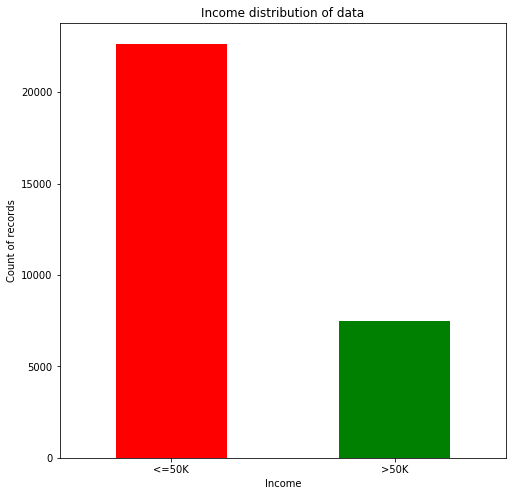

In [10]:
#Visualization of income significant data
plt.figure(figsize=(8, 8))
data.Income.value_counts().plot(kind='bar', color=["red","green"])
plt.ylabel('Count of records')
plt.xlabel('Income')
plt.title('Income distribution of data')
plt.xticks(rotation = 0)
plt.show()

From Steps 9 and 10, we know that 25% of our data has income greater than 50,000 per annum and the rest 75% have income less than or equal to 50,000

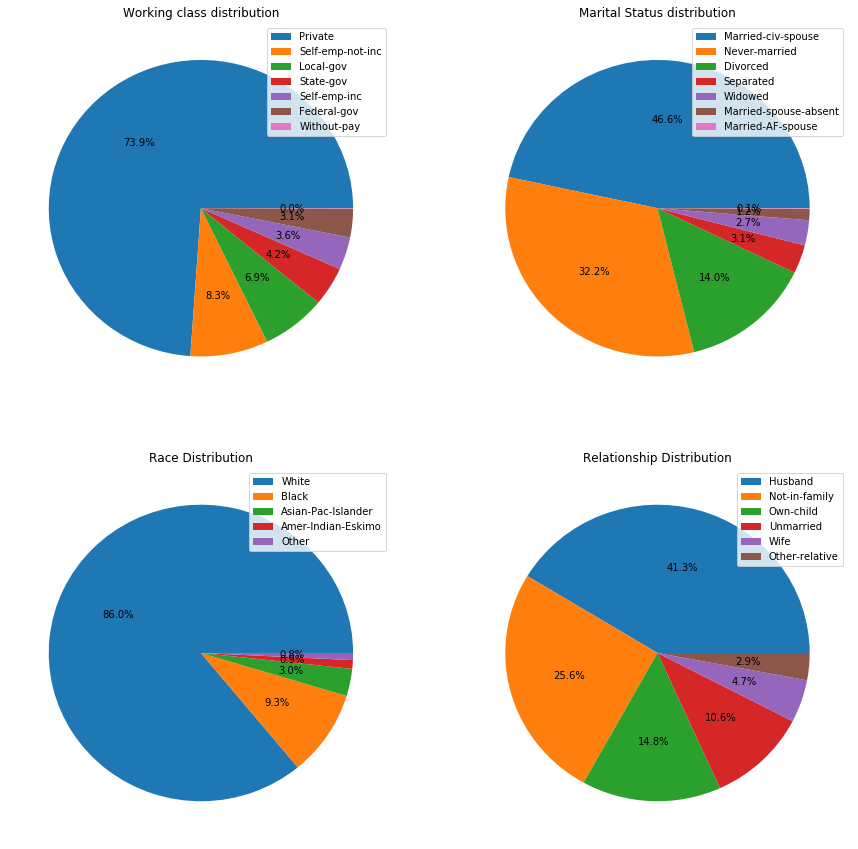

In [11]:
#How is our data distributed based on different attributes
plt.figure(figsize=(15, 15))
plt.subplot(2,2,1)
plt.pie(data.Work_Class.value_counts(), autopct='%1.1f%%')
plt.legend(data.Work_Class.value_counts().index, loc ='best')
plt.title('Working class distribution')

plt.subplot(2,2,2)
plt.pie(data.Marital_Status.value_counts(), autopct='%1.1f%%')
plt.legend(data.Marital_Status.value_counts().index, loc ='best')
plt.title('Marital Status distribution')

plt.subplot(2,2,3)
plt.pie(data.Race.value_counts(), autopct='%1.1f%%')
plt.legend(data.Race.value_counts().index, loc ='best')
plt.title('Race Distribution')

plt.subplot(2,2,4)
plt.pie(data.Relationship.value_counts(), autopct='%1.1f%%')
plt.legend(data.Relationship.value_counts().index, loc ='best')
plt.title('Relationship Distribution')

plt.show()

Step 11 provides us with the data distribution based on 4 different attributes:<br>
1. Based on Working class - We can see that our data comprises of majority (almost 75th percentile) of adults working in private sector and we have least amount of data from adults who are working without pay.
2. Based on Marital Status - We have a majority of data for adults who are married with civilian spouse and adults who were never married combined. The least amount of data is from adults who are married to spouse in armed forces.
3. Based on Race - Majority of our data consists of White adults and least amount of other races.
4. Based on Relationship - Almost half of our data has adults who are male and are husbands. The least number of adults are taking care of other relative in our dataset.

## Exploratory Data Analysis

Let us see how is the Income distributed based on Education and Sex

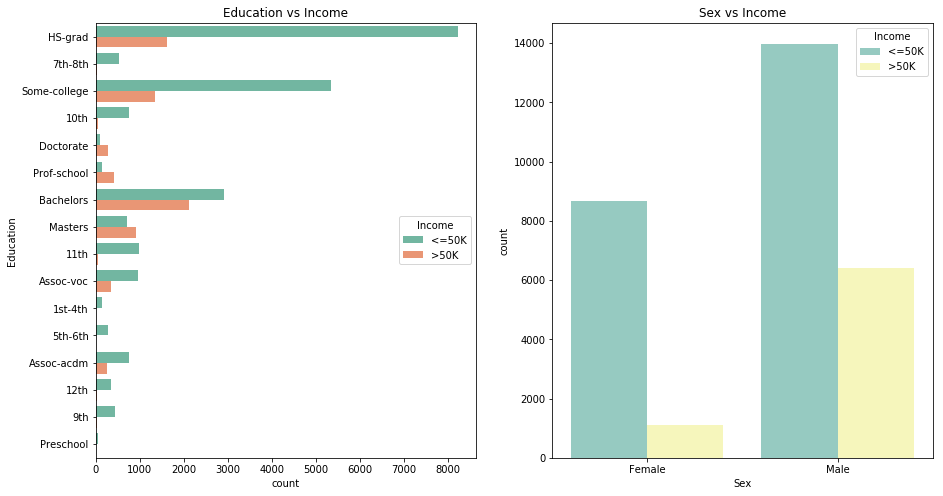

Number of females in DataSet:  9782
Number of females earning <= 50K:  8670
Number of females earning > 50K:  1112
Ratio of female earning <= 50K:  0.8863218155796361
Ratio of female earning > 50K:  0.11367818442036394
Number of males in DataSet:  20380
Number of males earning <= 50K:  13984
Number of males earning > 50K:  6396
Ratio of male earning <= 50K:  0.686162904808636
Ratio of male earning > 50K:  0.3138370951913641


In [12]:
#How is Education and Sex related to income.
fig, ((a,b)) = plt.subplots(1,2,figsize=(15,8))

x = sns.countplot(y=data['Education'],hue=data['Income'],ax=a, palette="Set2")
x.set_title("Education vs Income")
y = sns.countplot(x=data['Sex'],hue=data['Income'],ax=b, palette="Set3")
y.set_title("Sex vs Income")
plt.show()

print("Number of females in DataSet: ",len(data[data.Sex == 'Female']))
print("Number of females earning <= 50K: ",len(data[(data.Sex == 'Female') & (data.Income == '<=50K')]))
print("Number of females earning > 50K: ",len(data[(data.Sex == 'Female') & (data.Income == '>50K')]))
print("Ratio of female earning <= 50K: ",len(data[(data.Sex == 'Female') & (data.Income == '<=50K')])/len(data[data.Sex == 'Female']))
print("Ratio of female earning > 50K: ",len(data[(data.Sex == 'Female') & (data.Income == '>50K')])/len(data[data.Sex == 'Female']))
print("Number of males in DataSet: ",len(data[data.Sex == 'Male']))
print("Number of males earning <= 50K: ",len(data[(data.Sex == 'Male') & (data.Income == '<=50K')]))
print("Number of males earning > 50K: ",len(data[(data.Sex == 'Male') & (data.Income == '>50K')]))
print("Ratio of male earning <= 50K: ",len(data[(data.Sex == 'Male') & (data.Income == '<=50K')])/len(data[data.Sex == 'Male']))
print("Ratio of male earning > 50K: ",len(data[(data.Sex == 'Male') & (data.Income == '>50K')])/len(data[data.Sex == 'Male']))

Based on the above graphs we see the following :<br>
1. Education vs Income = We have majority of adults who are High School graduates. We also see that adults who have done professional schooling, Masters or Doctorates tend to earn more than 50K compared to people who have studied less. Also we see that there are hardly any adult who have studied less than 9th grade and are earning more than 50K per year. So we can say that the more the education, the more the chances of earning annual income greater than 50K.
2. Sex vs Income = We see that only 11% of women are earning more than 50K compared to 31% male. This shows that there is chance of gender bias in terms of Income.

**Question 1:** Does Capital gain increase if more number of hours are put in? 

**Answer:** Seems like it varies based on income. From the plot below, we see that for adults earning below or equal to 50K, there is not much increase in the capital gain irrespective of the hours they put in. However, for people earning  above 50K, we see that the mean capital gain is highest for adults who put in 35-37 hours of work. But on average, mean capital gain are higher for adults who put more than 40 hours of work per week.

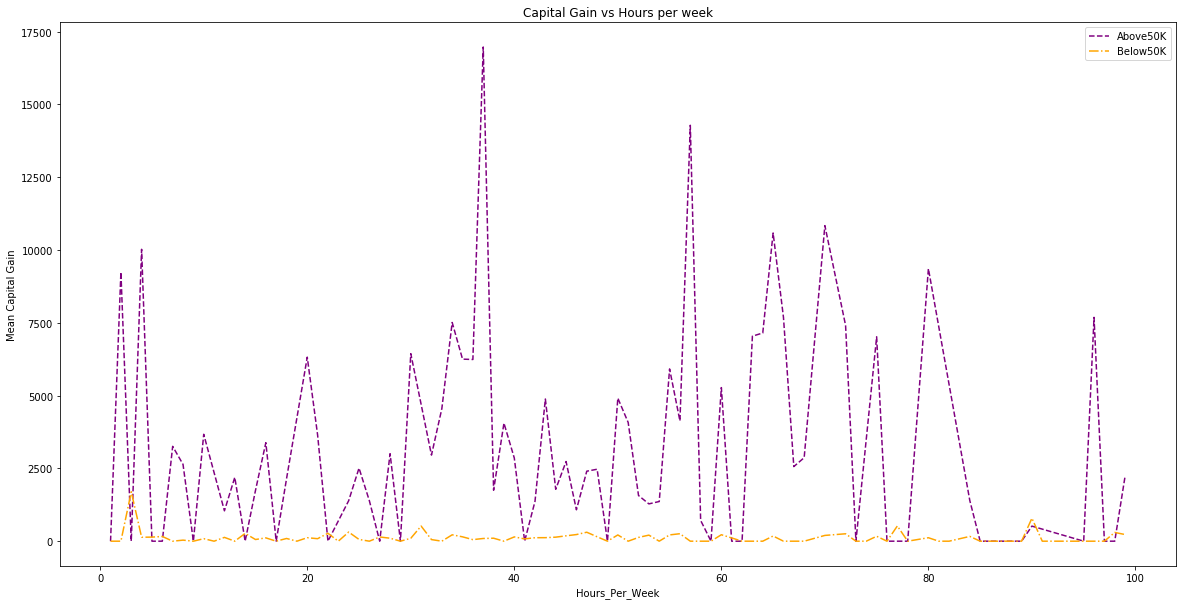

In [13]:
#Capital Gain vs No of Hours per week for two different income
plt.figure(figsize=(20, 10))
dataAbove = data.loc[(data.Income == '>50K')]
dataBelow = data.loc[(data.Income == '<=50K')]
plt.xlabel('Hours per week')
plt.ylabel('Mean Capital Gain')
plt.title('Capital Gain vs Hours per week');
dataAbove.groupby('Hours_Per_Week').Capital_Gain.mean().plot(kind = 'line', linestyle = '--', color = 'purple', label='Above50K')
dataBelow.groupby('Hours_Per_Week').Capital_Gain.mean().plot(kind = 'line', linestyle = '-.', color = 'orange', label='Below50K')
plt.legend()
plt.show();

**Question 2:** How does capital loss compare to age

**Answer:** We can see from the plot below that as a person ages, the capital loss slowly increases and is almost exponential  after 80 years and then decreases again.

c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


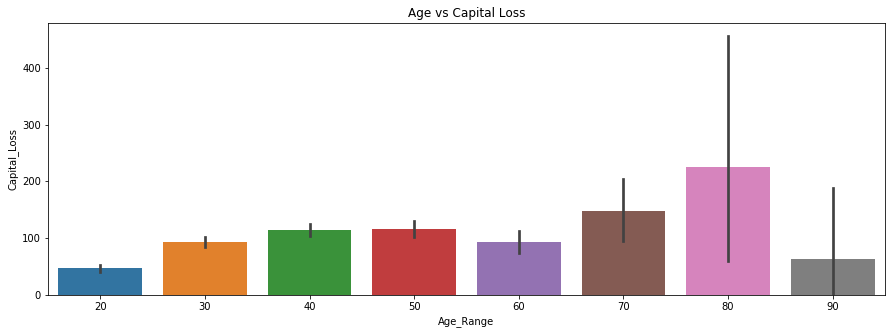

In [14]:
#How does age relate to capital loss
#As you age capital loss is more.
plt.figure(figsize=(15, 5))

#Function that groups age into a range
def set_age(row):
    if (row['Age'] >= 17 and row['Age'] <= 29):
       return 20
    elif (row['Age'] >= 30 and row['Age'] < 40):
       return 30
    elif (row['Age'] >= 40 and row['Age'] < 50):
       return 40
    elif (row['Age'] >= 50 and row['Age'] < 60):
       return 50
    elif (row['Age'] >= 60 and row['Age'] < 70):
       return 60
    elif (row['Age'] >= 70 and row['Age'] < 80):
       return 70
    elif (row['Age'] >= 80 and row['Age'] < 90):
       return 80
    else:
       return 90

#Adding temporary column for Age range.
dat = data.assign(Age_Range=data.apply(set_age, axis=1))
sns.barplot(x="Age_Range",y="Capital_Loss",data=dat)
plt.title("Age vs Capital Loss")
plt.show()

**Question 3:** Is there a difference in Education background for Female and Male for the two income group?

**Answer:** We see that on an average female are having more years of education for each of the two income group. We also saw from our Exploratory Data Analysis that percentage of female having income more than 50K is very less compared to male. So we can easily say, based on this dataset, that female on average earn less even though they have more education than men.

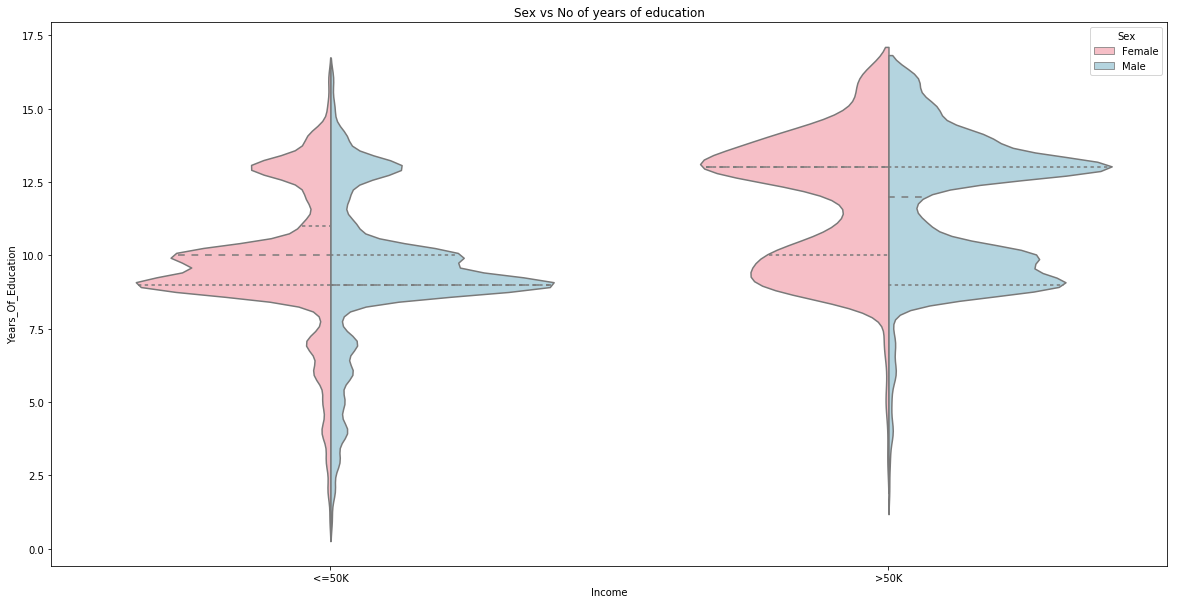

In [15]:
#How does Sex relate to years of education for the two income range
#Though there is not much difference if we take on an average female are having little bit more years of education than male.
plt.figure(figsize=(20, 10))
men = (data.Sex == 'Male')
women = (data.Sex == 'Female')

with sns.axes_style(style=None):
    sns.violinplot(data.Income, data.Years_Of_Education, hue=data.Sex, data=data,
                   split=True, inner="quartile",
                   palette=["lightpink","lightblue"]);
plt.title("Sex vs No of years of education")
plt.show()

**Question 4:** Is it possible to classify who works the most and least in terms of Marital Status and In terms of Relationship?

**Answer:** From the plots below we can draw the following conclusion:<br>
1. Marital Status vs Hours Per Week - In adults who are earning less than or equal to 50K, on average, people who are married to spouses in Armed Forces are usually putting in most of the hours and widowed adults are putting in the least. In adults earning above 50K, on average, Married people with absent spouse are putting in most of the hours where as people who are married to spouses in Armed Forces are usually putting the least.
2. Relationship vs Hours Per Week - In adults who are earning less than or equal to 50K, on average, female who are married(wife) are putting in least amount of work hours where as male who are married(husband) are putting in the most number of hours. In adults earning above 50K, on average, people who are not in a family are putting in most amount of work hours and female who are married are again putting in least number of hours. 

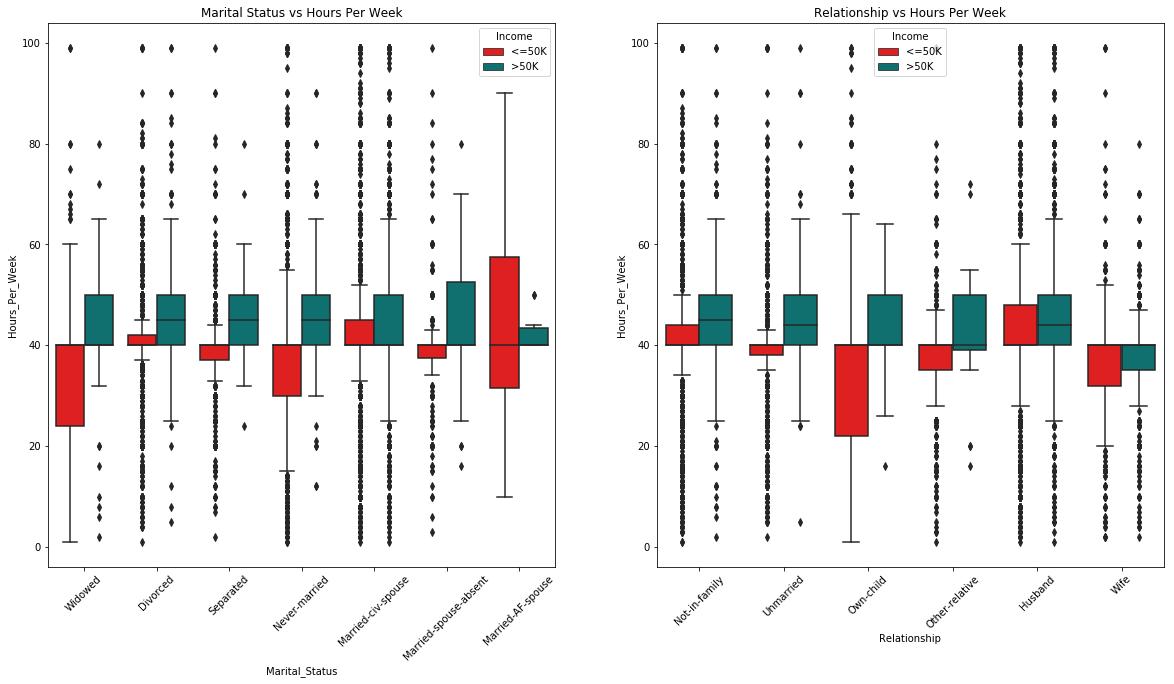

In [16]:
#Marital status vs relationship for the two income classes

plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
sns.boxplot(x="Marital_Status", y="Hours_Per_Week", hue="Income", data=data, palette=["red", "teal"])
plt.title("Marital Status vs Hours Per Week")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.boxplot(x="Relationship", y="Hours_Per_Week", hue="Income", data=data, palette=["red", "teal"] )
plt.title("Relationship vs Hours Per Week")
plt.xticks(rotation=45)

plt.show()

**Question 5:** In female adults, what is the trend in Education for different race.

**Answer:** We can see below that avarage years of education is 10th grade for women who are white, Asian Pacific Islander and American Indian Eskimos, however if we take the people who have highest education in terms of number of years then, white women are majority in terms of having 16 years of education (Doctorates) compared to Women who belong to Other catagory.

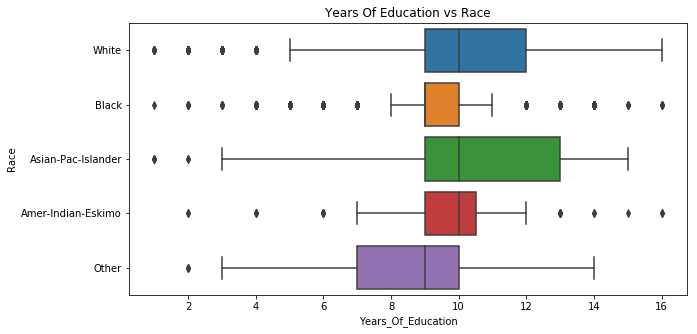

In [17]:
plt.figure(figsize=(10, 5))
female = data[(data.Sex == 'Female')]
sns.boxplot(x="Years_Of_Education", y="Race", data=female)
plt.title("Years Of Education vs Race")
plt.show()

#### Statistical Question<br>
How is the age related to the Income in US vs in other countries for the two income group. Is there a significant difference in data for the two income groups?<br><br>
**Answer:** We can see below that the peak age for a person earning 50K or less, in US and in other countries are almost similar which is mid to late 30s. Also we see that the peak age for a person earning bove 50K, no matter the country, is between early to mid 40s. We even notice that though the age across our dataset is not symmetric, the difference between the age for the two income groups are infact significant and not just noise. 

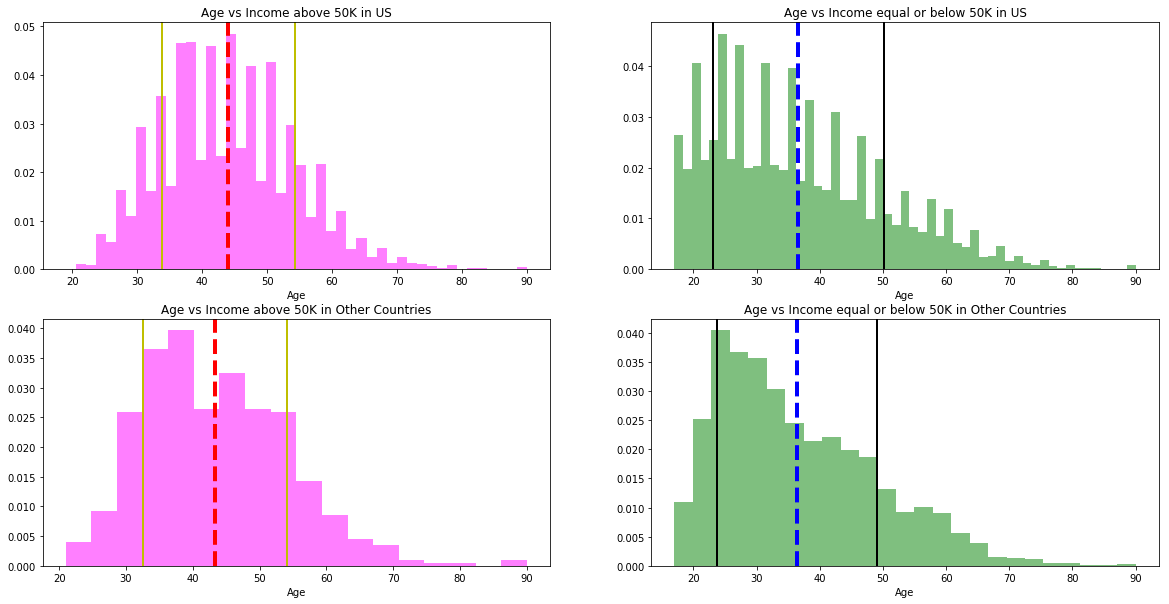

In [18]:
#Age vs Income in US and Age vs Income in Other countries for income <=50K and >50K

plt.figure(figsize=(20, 10))
#distinct datasets for US natives earning >50K and <= 50K
dataUSAbove = dataAbove.loc[(dataAbove.Native_Country == 'United-States')]
dataUSBelow = dataBelow.loc[(dataBelow.Native_Country == 'United-States')]
#distinct datasets for natives belonging to countries other than US earning >50K and <= 50K
dataOthersAbove = dataAbove.loc[(dataAbove.Native_Country != 'United-States')]
dataOthersBelow = dataBelow.loc[(dataBelow.Native_Country != 'United-States')]

#Age vs Income > 50K in US with mean and standard deviation
plt.subplot(2,2,1)
plt.hist(dataUSAbove.Age, density = True, color="magenta", bins='auto', alpha=.5) 
plt.axvline(dataUSAbove.Age.mean(), color='r', linestyle='dashed', linewidth=4)
plt.axvline(dataUSAbove.Age.mean() + dataUSAbove.Age.std(), color='y', linestyle='solid', linewidth=2)
plt.axvline(dataUSAbove.Age.mean() - dataUSAbove.Age.std(), color='y', linestyle='solid', linewidth=2 )
plt.xlabel("Age")
plt.title("Age vs Income above 50K in US")

#Age vs Income <= 50K in US with mean and standard deviation
plt.subplot(2,2,2)
plt.hist(dataUSBelow.Age, density = True, color="green", bins='auto', alpha=.5)
plt.axvline(dataUSBelow.Age.mean(), color='b', linestyle='dashed', linewidth=4)
plt.axvline(dataUSBelow.Age.mean() + dataUSBelow.Age.std(), color='black', linestyle='solid', linewidth=2)
plt.axvline(dataUSBelow.Age.mean() - dataUSBelow.Age.std(), color='black', linestyle='solid', linewidth=2 )
plt.xlabel("Age")
plt.title("Age vs Income equal or below 50K in US")

#Age vs Income > 50K in Other countries with mean and standard deviation
plt.subplot(2,2,3)
plt.hist(dataOthersAbove.Age, density = True, color="magenta", bins='auto', alpha=.5) 
plt.axvline(dataOthersAbove.Age.mean(), color='r', linestyle='dashed', linewidth=4)
plt.axvline(dataOthersAbove.Age.mean() + dataOthersAbove.Age.std(), color='y', linestyle='solid', linewidth=2)
plt.axvline(dataOthersAbove.Age.mean() - dataOthersAbove.Age.std(), color='y', linestyle='solid', linewidth=2 )
plt.xlabel("Age")
plt.title("Age vs Income above 50K in Other Countries")

#Age vs Income <= 50K in Other countries with mean and standard deviation
plt.subplot(2,2,4)
plt.hist(dataOthersBelow.Age, density = True, color="green", bins='auto', alpha=.5)
plt.axvline(dataOthersBelow.Age.mean(), color='b', linestyle='dashed', linewidth=4)
plt.axvline(dataOthersBelow.Age.mean() + dataOthersBelow.Age.std(), color='black', linestyle='solid', linewidth=2)
plt.axvline(dataOthersBelow.Age.mean() - dataOthersBelow.Age.std(), color='black', linestyle='solid', linewidth=2 )
plt.xlabel("Age")
plt.title("Age vs Income equal or below 50K in Other Countries")

plt.show()

In [19]:
#Calculate variance manually and through numpy method and see the difference.
variance = sum((data.Age - data.Age.mean()) ** 2) / (data.Age.count() - 1)
print(variance)
print(np.var(data.Age))

172.51941880039016
172.51369903979509


In [20]:
#Calculate standard deviation manually and through numpy method and see the difference.
standard_deviation = variance ** 0.5
print(standard_deviation)
#print(np.std(data.Age))
print(np.std(data.Age, ddof = 1))

13.134664776856322
13.134664776855985


In [21]:
#Calculate standard error manually and through numpy method and see the difference.
standard_error = standard_deviation / (data.Age.count() ** 0.5)
print(standard_error)
print(standard_deviation / (data.Age.count() ** 0.5))

0.07562909880582315
0.07562909880582315


In [22]:
income_summary = data.groupby('Income').describe()

In [23]:
#Age statistics for the two income groups
income_summary.Age.transpose()

Income,<=50K,>50K
count,22654.000000,7508.000000
mean,36.608060,43.959110
std,13.464631,10.269633
min,17.000000,19.000000
25%,26.000000,36.000000
50%,34.000000,43.000000
75%,45.000000,51.000000
max,90.000000,90.000000


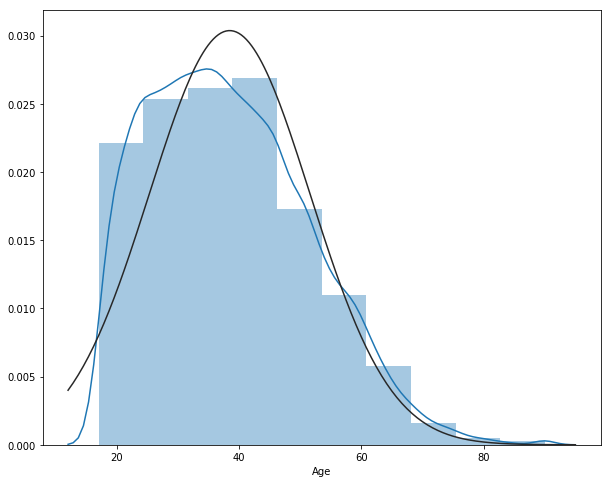

In [24]:
# Is age symmetric across the dataset? Looks like it is skewed towards the right 
plt.figure(figsize=(10, 8))
sns.distplot(data.Age, bins = 10, fit = stats.norm);

Text(0.5,1,'Age vs Norm')

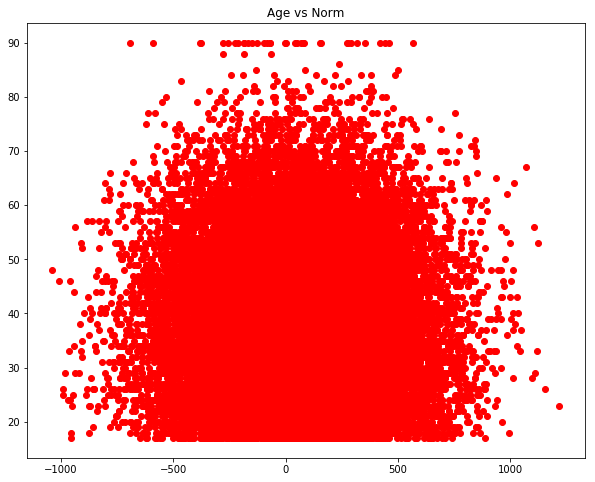

In [25]:
#Comparing the Age distribution by QQ plot.
#Not a straight line from bottom left to top right so not normal.
# Making two variables.
plt.figure(figsize=(10, 8))
rand_norm_qq = np.random.normal(50, 300, 30162)
age = data.Age

# Sorting the values in ascending order.
rand_norm_qq.sort
age.sort_values

# Plotting the variable rand1 against norm in qqplots.
plt.plot(rand_norm_qq, age, "o",color = 'r');
plt.title('Age vs Norm')

In [26]:
print('Average hours put per week for person earning less than or equal to 50K:', data[data.Income == '<=50K'].Age.mean())
print('Average hours put per week for person earning more than to 50K:', data[data.Income == '>50K'].Age.mean())

Average hours put per week for person earning less than or equal to 50K: 36.60806038668668
Average hours put per week for person earning more than to 50K: 43.95911028236548


In [27]:
#Thus we can say that the difference is significant and not due to noise.
stats.ttest_ind(data[data.Income == '<=50K'].Age,
                data[data.Income == '>50K'].Age)

Ttest_indResult(statistic=-43.314377884979315, pvalue=0.0)

### Further Research

Our dataset has attribute Final_Weight, for which the calculations are drawn from geographic data. It would have been helpful to compare the final weight and do further analysis provided we knew the locations for each of these adults, which is missing currently. Also we could have had more specific data analysis if we knew the salaries for each of these adults.